***Import Libraries***

In [129]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

**Import the CSVs**

In [130]:
#Import the data sets
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'])
goog = pd.read_csv('GOOG.csv', parse_dates=['Date'])
msft = pd.read_csv('MSFT.csv', parse_dates=['Date'])

#Make sure they imported correctly and have reminder of data set layout
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,29.910000,30.250000,29.400000,29.860001,21.869667,76935100
1,2007-01-04,29.700001,29.969999,29.440001,29.809999,21.833036,45774500
2,2007-01-05,29.629999,29.750000,29.450001,29.639999,21.708527,44607200
3,2007-01-08,29.650000,30.100000,29.530001,29.930000,21.920927,50220200
4,2007-01-09,30.000000,30.180000,29.730000,29.959999,21.942904,44636600


Displaying a graph of all three companies open prices over time

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2007-01-03  3.081786  3.092143  2.925000  2.992857   2.569716  1238319600
2007-01-04  3.001786  3.069643  2.993571  3.059286   2.626753   847260400
2007-01-05  3.063214  3.078571  3.014286  3.037500   2.608047   834741600
2007-01-08  3.070000  3.090357  3.045714  3.052500   2.620926   797106800
2007-01-09  3.087500  3.320714  3.041071  3.306071   2.838647  3349298400


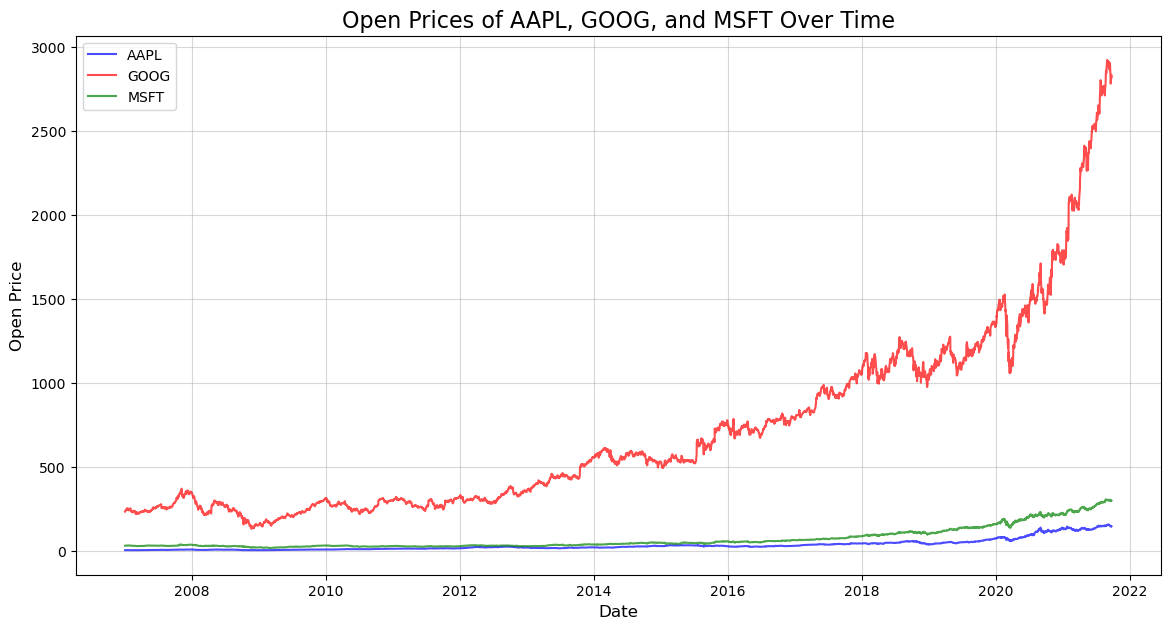

In [131]:
#Make it so the data sets are indexed by the date, makes them easier to parse
aapl.set_index('Date', inplace=True)
goog.set_index('Date', inplace=True)
msft.set_index('Date', inplace=True)

#Look at structure after this change
print(aapl.head())

#Plot all three over time
plt.figure(figsize=(14, 7))
plt.plot(aapl['Open'], label='AAPL', color='blue', alpha=0.7)
plt.plot(goog['Open'], label='GOOG', color='red', alpha=0.7)
plt.plot(msft['Open'], label='MSFT', color='green', alpha=0.7)
plt.title('Open Prices of AAPL, GOOG, and MSFT Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

When comparing the three stocks it is clear that goog is doing by far the best. The rate that they're growing compared to aapl and msft is astounding. If I had to pick a stock to invest in it would certainly be goog, and I would have invested either right after they hit the market or in the dip during 2020.

Show a stackplot of the low, mean, and high prices of microsoft during 2018

C:\Users\chaos\AppData\Local\Temp\ipykernel_23076\3016781008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft2018.loc[:, 'Mean'] = (msft2018.loc[:, 'High'] + msft2018.loc[:, 'Low']) / 2


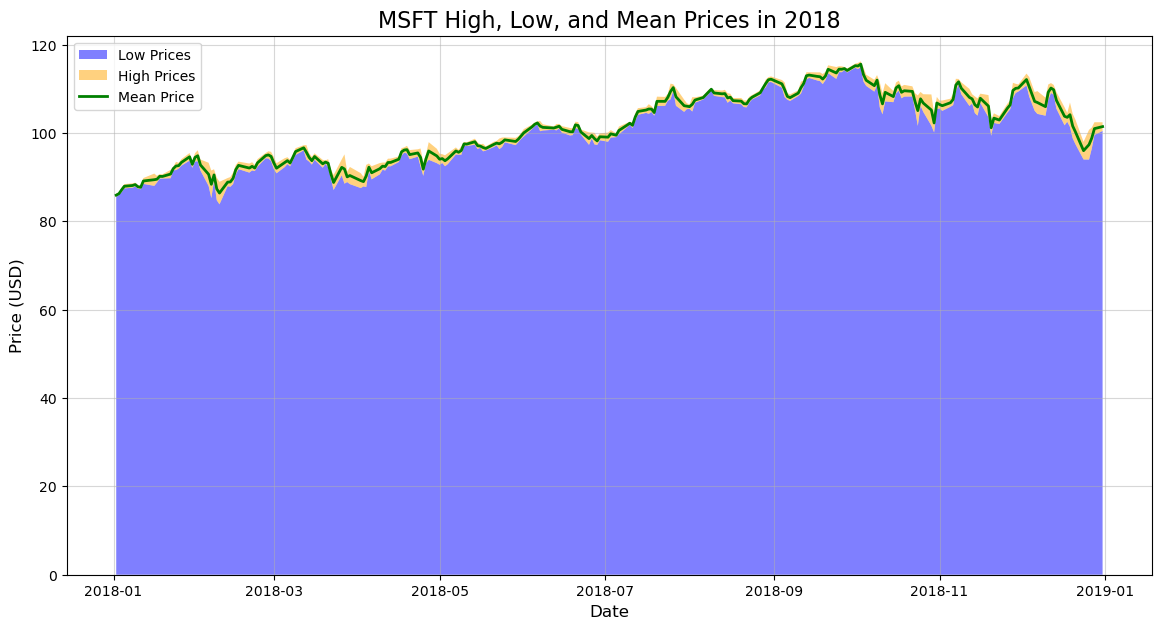

In [132]:


#Get 2018 Microsoft data
msft2018 = msft.iloc[msft.index.year == 2018]

#Calculate the mean prices
msft2018.loc[:, 'Mean'] = (msft2018.loc[:, 'High'] + msft2018.loc[:, 'Low']) / 2

#Plot everything
plt.figure(figsize=(14, 7))
plt.stackplot(msft2018.index, msft2018['Low'], msft2018['High'] - msft2018['Low'], 
              labels=['Low Prices', 'High Prices'], alpha=0.5, colors=['blue', 'orange'])
plt.plot(msft2018.index, msft2018['Mean'], label='Mean Price', color='green', linewidth=2)
plt.title('MSFT High, Low, and Mean Prices in 2018', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

Plot a weekly, monthly, and yearly rolling window mean for the open price of goog, aapl, and msft

2007-01-03 00:00:00
2021-09-24 00:00:00


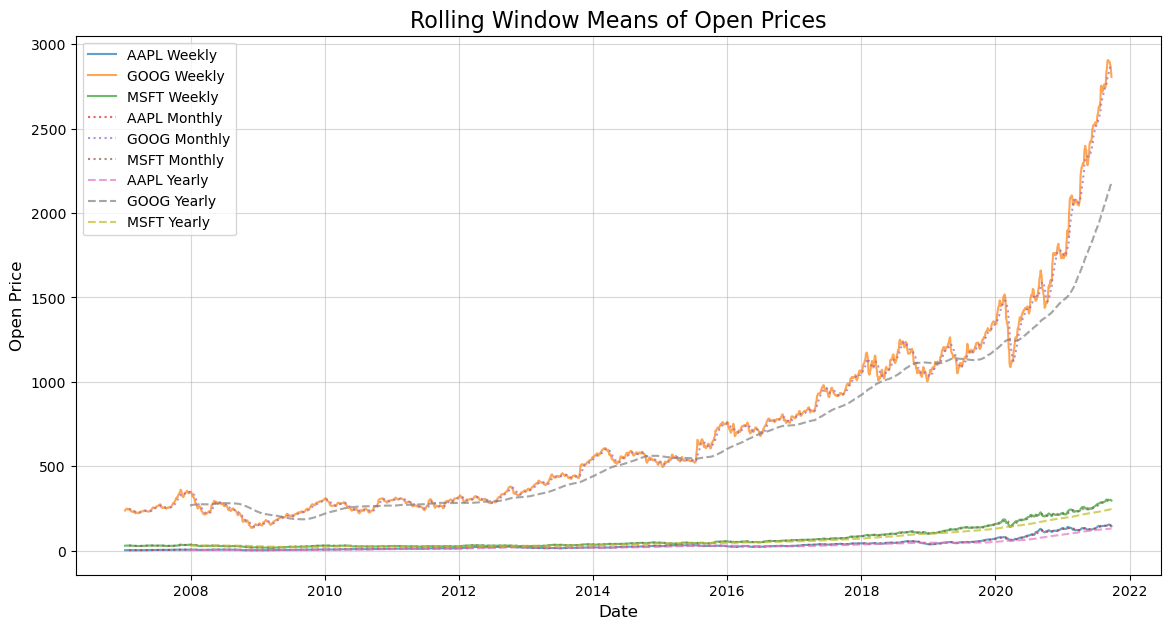

In [133]:




#Have to do this because the data sets don't overlap, so I need to get data that is universal
start_date = max(aapl.index.min(), goog.index.min(), msft.index.min())
end_date = min(aapl.index.max(), goog.index.max(), msft.index.max())

print(start_date)
print(end_date)

#The sections of each data set that they all share
aaplShared = aapl.loc[start_date:end_date]
googShared = goog.loc[start_date:end_date]
msftShared = msft.loc[start_date:end_date]

#Used for nifty very smart for loop
rolling_windows = {'Weekly': 5, 'Monthly': 20, 'Yearly': 250}
line_styles = {'Weekly': 'solid', 'Monthly': 'dotted', 'Yearly': 'dashed'}

plt.figure(figsize=(14, 7))

#Loop through every window size and plot all three datasets for the window. With a different line style based on the current window size
for label, window in rolling_windows.items():
    plt.plot(aaplShared['Open'].rolling(window=window).mean(), label=f'AAPL {label}', linestyle=line_styles[label], alpha=0.7)
    plt.plot(googShared['Open'].rolling(window=window).mean(), label=f'GOOG {label}', linestyle=line_styles[label], alpha=0.7)
    plt.plot(msftShared['Open'].rolling(window=window).mean(), label=f'MSFT {label}', linestyle=line_styles[label], alpha=0.7)

plt.title('Rolling Window Means of Open Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

Once again it is clear that goog is by far the highest growing of the three. Using this graph also gives a more in depth view of the trends over time, allowing you to look at what things are doing long term. Going by the year rolling mean it would seem that there isn't really an optimal time to buy goog other than at the beggining. But when you look at the monthly and weekly you get a better view of what was going on, revealing times when buying would have been a good idea.